___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [ ]:
!python --version

Python 3.7.13


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info() # no null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
drop = ["RowNumber","CustomerId","Surname"]

In [ ]:
df.drop(df[drop],inplace=True,axis=1)

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


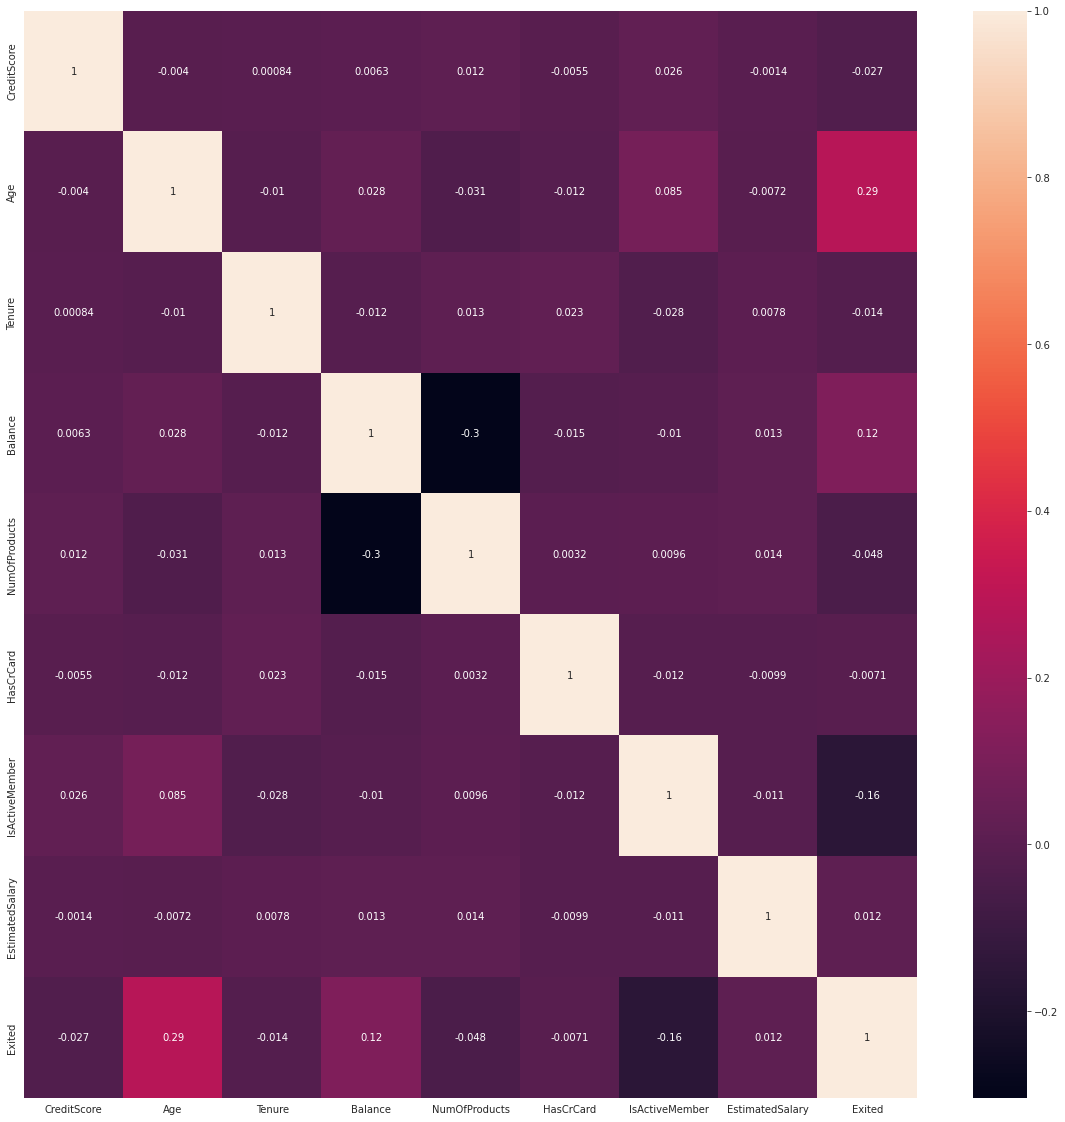

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);
#we dont seem to have multicolenary

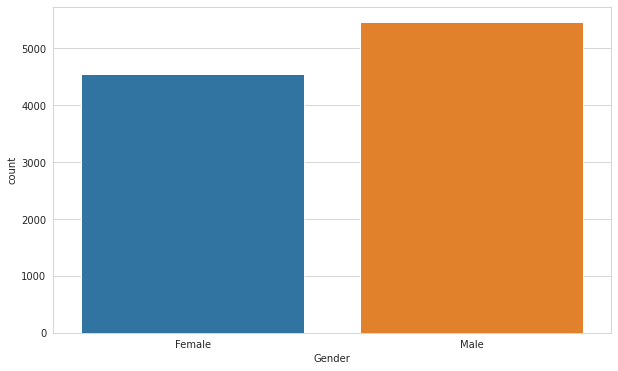

In [ ]:
sns.countplot(df["Gender"]);

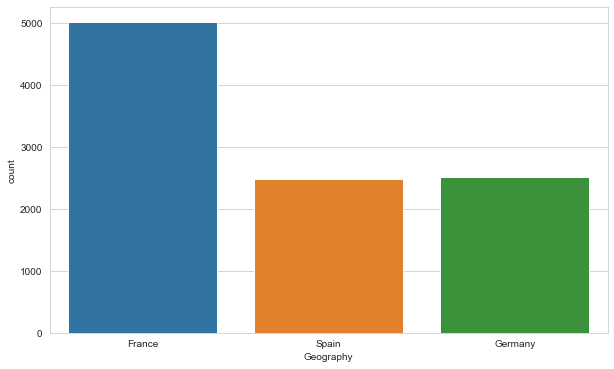

In [ ]:
sns.countplot(df["Geography"]);

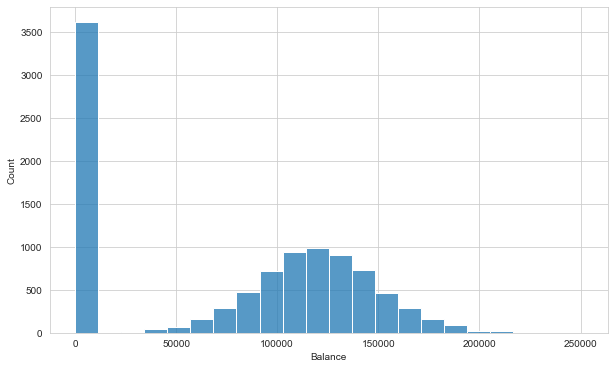

In [ ]:
sns.histplot(df.Balance);

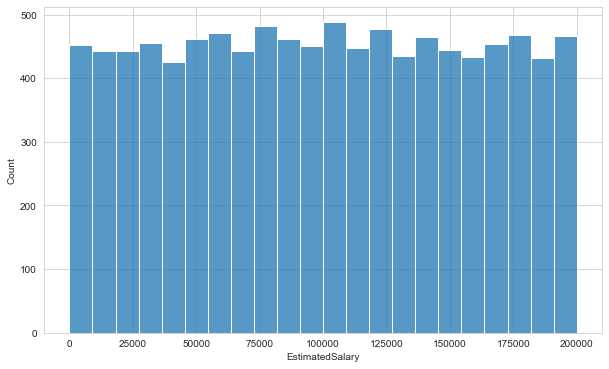

In [ ]:
sns.histplot(df.EstimatedSalary);

In [ ]:
df = pd.get_dummies(df,columns=["Geography","Gender"])

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,1,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,1,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,1,0,0,1,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,0,1,0,0,1


# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
seed = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [ ]:
#!pip3 install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train.shape

(9000, 13)

In [ ]:
X_test.shape

(1000, 13)

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.6544581651687622
accuracy :  0.7950000166893005


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [41]:
from tensorflow.keras.optimizers import Adam

In [42]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(24, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [43]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [44]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 2s 15ms/step - loss: 0.6860 - recall: 0.2518 - val_loss: 0.6540 - val_recall: 0.3923
Epoch 2/200
64/64 [==============================] - 0s 4ms/step - loss: 0.6610 - recall: 0.4764 - val_loss: 0.6422 - val_recall: 0.5967
Epoch 3/200
64/64 [==============================] - 0s 4ms/step - loss: 0.6343 - recall: 0.5908 - val_loss: 0.5961 - val_recall: 0.6077
Epoch 4/200
64/64 [==============================] - 0s 5ms/step - loss: 0.6177 - recall: 0.6429 - val_loss: 0.5767 - val_recall: 0.6519
Epoch 5/200
64/64 [==============================] - 1s 11ms/step - loss: 0.6057 - recall: 0.6659 - val_loss: 0.5889 - val_recall: 0.6961
Epoch 6/200
64/64 [==============================] - 0s 7ms/step - loss: 0.5940 - recall: 0.6689 - val_loss: 0.5251 - val_recall: 0.6298
Epoch 7/200
64/64 [==============================] - 0s 4ms/step - loss: 0.5844 - recall: 0.6768 - val_loss: 0.5595 - val_recall: 0.6685
Epoch 8/200
64/64 [====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [45]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[637 159]
 [ 54 150]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       796
           1       0.49      0.74      0.58       204

    accuracy                           0.79      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.79      0.80      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [47]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [50]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, verbose = 1)

Epoch 1/100
254/254 [==============================] - 2s 8ms/step - loss: 0.3386 - accuracy: 0.8610 - val_loss: 0.2964 - val_accuracy: 0.8867
Epoch 2/100
254/254 [==============================] - 2s 7ms/step - loss: 0.3341 - accuracy: 0.8641 - val_loss: 0.3049 - val_accuracy: 0.8856
Epoch 3/100
254/254 [==============================] - 2s 7ms/step - loss: 0.3360 - accuracy: 0.8619 - val_loss: 0.2954 - val_accuracy: 0.8844
Epoch 4/100
254/254 [==============================] - 1s 5ms/step - loss: 0.3364 - accuracy: 0.8593 - val_loss: 0.2932 - val_accuracy: 0.8856
Epoch 5/100
254/254 [==============================] - 2s 6ms/step - loss: 0.3363 - accuracy: 0.8586 - val_loss: 0.3063 - val_accuracy: 0.8822
Epoch 6/100
254/254 [==============================] - 1s 5ms/step - loss: 0.3361 - accuracy: 0.8619 - val_loss: 0.2950 - val_accuracy: 0.8900
Epoch 7/100
254/254 [==============================] - 1s 5ms/step - loss: 0.3343 - accuracy: 0.8622 - val_loss: 0.2938 - val_accuracy: 0.8822

In [51]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[743  53]
 [103 101]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       796
           1       0.66      0.50      0.56       204

    accuracy                           0.84      1000
   macro avg       0.77      0.71      0.73      1000
weighted avg       0.83      0.84      0.84      1000



### Add Dropout Layer

In [52]:
from tensorflow.keras.layers import Dropout

In [53]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(6, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [54]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, verbose = 1)


Epoch 1/100
254/254 [==============================] - 2s 4ms/step - loss: 0.5896 - accuracy: 0.7714 - val_loss: 0.5185 - val_accuracy: 0.7989
Epoch 2/100
254/254 [==============================] - 1s 5ms/step - loss: 0.5443 - accuracy: 0.7948 - val_loss: 0.5024 - val_accuracy: 0.7989
Epoch 3/100
254/254 [==============================] - 1s 4ms/step - loss: 0.5209 - accuracy: 0.7957 - val_loss: 0.4905 - val_accuracy: 0.7989
Epoch 4/100
254/254 [==============================] - 1s 3ms/step - loss: 0.5159 - accuracy: 0.7959 - val_loss: 0.4835 - val_accuracy: 0.7989
Epoch 5/100
254/254 [==============================] - 1s 3ms/step - loss: 0.5045 - accuracy: 0.7960 - val_loss: 0.4852 - val_accuracy: 0.7989
Epoch 6/100
254/254 [==============================] - 1s 3ms/step - loss: 0.5013 - accuracy: 0.7960 - val_loss: 0.4763 - val_accuracy: 0.7989
Epoch 7/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4992 - accuracy: 0.7960 - val_loss: 0.4767 - val_accuracy: 0.7989

In [55]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[796   0]
 [204   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



### Add Early Stop

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [60]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, verbose = 1,
          callbacks = [early_stop])

Epoch 1/100
254/254 [==============================] - 3s 12ms/step - loss: 0.4493 - accuracy: 0.7960 - val_loss: 0.3994 - val_accuracy: 0.7989
Epoch 2/100
254/254 [==============================] - 2s 9ms/step - loss: 0.4522 - accuracy: 0.7960 - val_loss: 0.4059 - val_accuracy: 0.7989
Epoch 3/100
254/254 [==============================] - 2s 9ms/step - loss: 0.4505 - accuracy: 0.7960 - val_loss: 0.4002 - val_accuracy: 0.7989
Epoch 4/100
254/254 [==============================] - 2s 9ms/step - loss: 0.4503 - accuracy: 0.7960 - val_loss: 0.3961 - val_accuracy: 0.7989
Epoch 5/100
254/254 [==============================] - 3s 11ms/step - loss: 0.4536 - accuracy: 0.7960 - val_loss: 0.4085 - val_accuracy: 0.7989
Epoch 6/100
254/254 [==============================] - 2s 9ms/step - loss: 0.4516 - accuracy: 0.7960 - val_loss: 0.3941 - val_accuracy: 0.7989
Epoch 7/100
254/254 [==============================] - 3s 11ms/step - loss: 0.4507 - accuracy: 0.7960 - val_loss: 0.4022 - val_accuracy: 0.7

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

In [61]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [65]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [62]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 24, activation = 'relu'))
    classifier.add(Dense(units = 12, activation = 'relu'))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [63]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)


In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 100)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [ ]:
grid_model.best_score_


In [ ]:
grid_model.best_params_


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Final Model and Model Deployment

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)


In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___